In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

__Code for finding damping of surface waves, experiments conducted 26.03.25. See: https://docs.google.com/document/d/1XbN39MnCO8LLxHQggMc_9GKM4Xrf986bgcMyIGY5DgE/edit?usp=share_link for report.__

Viscous boundary layer height for oscillatory flow:

$\delta = \sqrt{\frac{2 \nu}{2\pi f}}$

In [62]:
f = [0.5, 0.7, 1]
mu = 10e-6
delta = [0, 0, 0]

for i in range(3):
    delta[i] = np.sqrt((2*mu)/(2*np.pi*f[i]))  # [m]

print(f'{delta} m')

[0.00252313252202016, 0.002132436186229231, 0.0017841241161527712] m


Moving on to the data from the lab:

In [63]:
headers = ['time', 'p2', 'p1', 'p4', 'p3', 'speed_of_sound']  # column names for the datasets

In [64]:
 # Reading in the data
x9793_f1_r1 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x9793/f1/f1_A03_x9793_run1.csv', names=headers)
x9793_f1_r2 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x9793/f1/f1_A03_x9793_run2.csv', names=headers)
x9793_f1_r3 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x9793/f1/f1_A03_x9793_run3.csv', names=headers)

x1059_f1_r1 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x1059/f1/f1_A03_x1059_run1.csv', names=headers)
x1059_f1_r2 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x1059/f1/f1_A03_x1059_run2.csv', names=headers)
x1059_f1_r3 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x1059/f1/f1_A03_x1059_run3.csv', names=headers)

x1135_f1_r1 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x11350/f1/f1_A03_x11350_run1.csv', names=headers)
x1135_f1_r2 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x11350/f1/f1_A03_x11350_run2.csv', names=headers)
x1135_f1_r3 = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/x11350/f1/f1_A03_x11350_run3.csv', names=headers)

In [65]:
# function for 'cleaning' the data, taking off the mean of the first 1000 rows (still water, no waves)
def cleaning_df(df):
    for column in range(1, 5):
        mean = df.iloc[:1000, column].mean()
        df.iloc[:, column] = df.iloc[:, column] - mean
    return df

In [66]:
# Clean datasets
x9793_f1_r1_clean = cleaning_df(x9793_f1_r1)
x9793_f1_r2_clean = cleaning_df(x9793_f1_r2)
x9793_f1_r3_clean = cleaning_df(x9793_f1_r3)

x1059_f1_r1_clean = cleaning_df(x1059_f1_r1)
x1059_f1_r2_clean = cleaning_df(x1059_f1_r2)
x1059_f1_r3_clean = cleaning_df(x1059_f1_r3)

x1135_f1_r1_clean = cleaning_df(x1135_f1_r1)
x1135_f1_r2_clean = cleaning_df(x1135_f1_r2)
x1135_f1_r3_clean = cleaning_df(x1135_f1_r3)

In [67]:
# Converting the timestamps to datetime values
x9793_f1_r1_clean['time'] = pd.to_datetime(x9793_f1_r1_clean['time'])
x9793_f1_r2_clean['time'] = pd.to_datetime(x9793_f1_r2_clean['time'])
x9793_f1_r3_clean['time'] = pd.to_datetime(x9793_f1_r3_clean['time'])

x1059_f1_r1_clean['time'] = pd.to_datetime(x1059_f1_r1_clean['time'])
x1059_f1_r2_clean['time'] = pd.to_datetime(x1059_f1_r2_clean['time'])
x1059_f1_r3_clean['time'] = pd.to_datetime(x1059_f1_r3_clean['time'])

x1135_f1_r1_clean['time'] = pd.to_datetime(x1135_f1_r1_clean['time'])
x1135_f1_r2_clean['time'] = pd.to_datetime(x1135_f1_r2_clean['time'])
x1135_f1_r3_clean['time'] = pd.to_datetime(x1135_f1_r3_clean['time'])

In [68]:
# Positions of probes
x = np.array([9.793, 9.992, 10.192, 10.391, 10.590, 10.7885, 10.9855, 11.1835, 11.350, 11.549, 11.746, 11.944])

In [69]:
# Constants
f = 1  # frequency
beach_loc = 9.983  # location of beach after wave maker
g = 9.81 # gravity 
rho = 1000  # water density
nu = 10e-6  # water viscosity
H0 = 0.4  # water depth before beach
H1 = 0.2  # water depth over beach

In [70]:
# Phase and group velocity, shallow water waves

c0 = np.sqrt(g*H0)  # wave velocity before beach
c1 = np.sqrt(g*H1)  # wave velocity over beach

In [71]:
def time_of_arrival(df, position, wave_no):
    ''' 
    Find time of arrival of the wave number x for f = 1 Hz.
    Find index of where in df the wave arrives.
    '''

    if position > beach_loc:
        time_deep = beach_loc/c0
        time_shallow = (position - beach_loc)/c1

        arrival = time_deep + time_shallow + wave_no*f

    else:
        time_deep = position/c0
        arrival = time_deep + wave_no*f

    rows_per_second = df.groupby(pd.Grouper(key='time', freq='s')).size()

    index = int(rows_per_second.iloc[1]*arrival)

    return index

In [72]:
# x= 9.9793 (p1), run 1
wave_idx_p1_x9_r1 = time_of_arrival(x9793_f1_r1_clean, x[0], 11)  # index of 11th wave passing the first probe
wave_idx_p2_x9_r1 = time_of_arrival(x9793_f1_r1_clean, x[1], 11)
wave_idx_p3_x9_r1 = time_of_arrival(x9793_f1_r1_clean, x[2], 11)
wave_idx_p4_x9_r1 = time_of_arrival(x9793_f1_r1_clean, x[3], 11)

# x= 9.9793 (p1), run 2
wave_idx_p1_x9_r2 = time_of_arrival(x9793_f1_r2_clean, x[0], 11)  
wave_idx_p2_x9_r2 = time_of_arrival(x9793_f1_r2_clean, x[1], 11)
wave_idx_p3_x9_r2 = time_of_arrival(x9793_f1_r2_clean, x[2], 11)
wave_idx_p4_x9_r2 = time_of_arrival(x9793_f1_r2_clean, x[3], 11)

# x= 9.9793 (p1), run 3
wave_idx_p1_x9_r3 = time_of_arrival(x9793_f1_r3_clean, x[0], 11) 
wave_idx_p2_x9_r3 = time_of_arrival(x9793_f1_r3_clean, x[1], 11)
wave_idx_p3_x9_r3 = time_of_arrival(x9793_f1_r3_clean, x[2], 11)
wave_idx_p4_x9_r3 = time_of_arrival(x9793_f1_r3_clean, x[3], 11)

In [73]:
# x= 10.59 (p1), run 1
wave_idx_p1_x10_r1 = time_of_arrival(x1059_f1_r1_clean, x[4], 11)  # index of 11th wave passing the first probe
wave_idx_p2_x10_r1 = time_of_arrival(x1059_f1_r1_clean, x[5], 11)
wave_idx_p3_x10_r1 = time_of_arrival(x1059_f1_r1_clean, x[6], 11)
wave_idx_p4_x10_r1 = time_of_arrival(x1059_f1_r1_clean, x[7], 11)

# x= 10.59 (p1), run 2
wave_idx_p1_x10_r2 = time_of_arrival(x1059_f1_r2_clean, x[4], 11)  
wave_idx_p2_x10_r2 = time_of_arrival(x1059_f1_r2_clean, x[5], 11)
wave_idx_p3_x10_r2 = time_of_arrival(x1059_f1_r2_clean, x[6], 11)
wave_idx_p4_x10_r2 = time_of_arrival(x1059_f1_r2_clean, x[7], 11)

# x= 10.59 (p1), run 3
wave_idx_p1_x10_r3 = time_of_arrival(x1059_f1_r3_clean, x[4], 11) 
wave_idx_p2_x10_r3 = time_of_arrival(x1059_f1_r3_clean, x[5], 11)
wave_idx_p3_x10_r3 = time_of_arrival(x1059_f1_r3_clean, x[6], 11)
wave_idx_p4_x10_r3 = time_of_arrival(x1059_f1_r3_clean, x[7], 11)

In [74]:
# x= 11.35 (p1), run 1
wave_idx_p1_x11_r1 = time_of_arrival(x1135_f1_r1_clean, x[8], 11)  # index of 11th wave passing the first probe
wave_idx_p2_x11_r1 = time_of_arrival(x1135_f1_r1_clean, x[9], 11)
wave_idx_p3_x11_r1 = time_of_arrival(x1135_f1_r1_clean, x[10], 11)
wave_idx_p4_x11_r1 = time_of_arrival(x1135_f1_r1_clean, x[11], 11)

# x= 11.35 (p1), run 2
wave_idx_p1_x11_r2 = time_of_arrival(x1135_f1_r2_clean, x[8], 11)  
wave_idx_p2_x11_r2 = time_of_arrival(x1135_f1_r2_clean, x[9], 11)
wave_idx_p3_x11_r2 = time_of_arrival(x1135_f1_r2_clean, x[10], 11)
wave_idx_p4_x11_r2 = time_of_arrival(x1135_f1_r2_clean, x[11], 11)

# x= 11.35 (p1), run 3
wave_idx_p1_x11_r3 = time_of_arrival(x1135_f1_r3_clean, x[8], 11) 
wave_idx_p2_x11_r3 = time_of_arrival(x1135_f1_r3_clean, x[9], 11)
wave_idx_p3_x11_r3 = time_of_arrival(x1135_f1_r3_clean, x[10], 11)
wave_idx_p4_x11_r3 = time_of_arrival(x1135_f1_r3_clean, x[11], 11)

Text(0.5, 0.98, '11th wave, f=1Hz, A=0.3V')

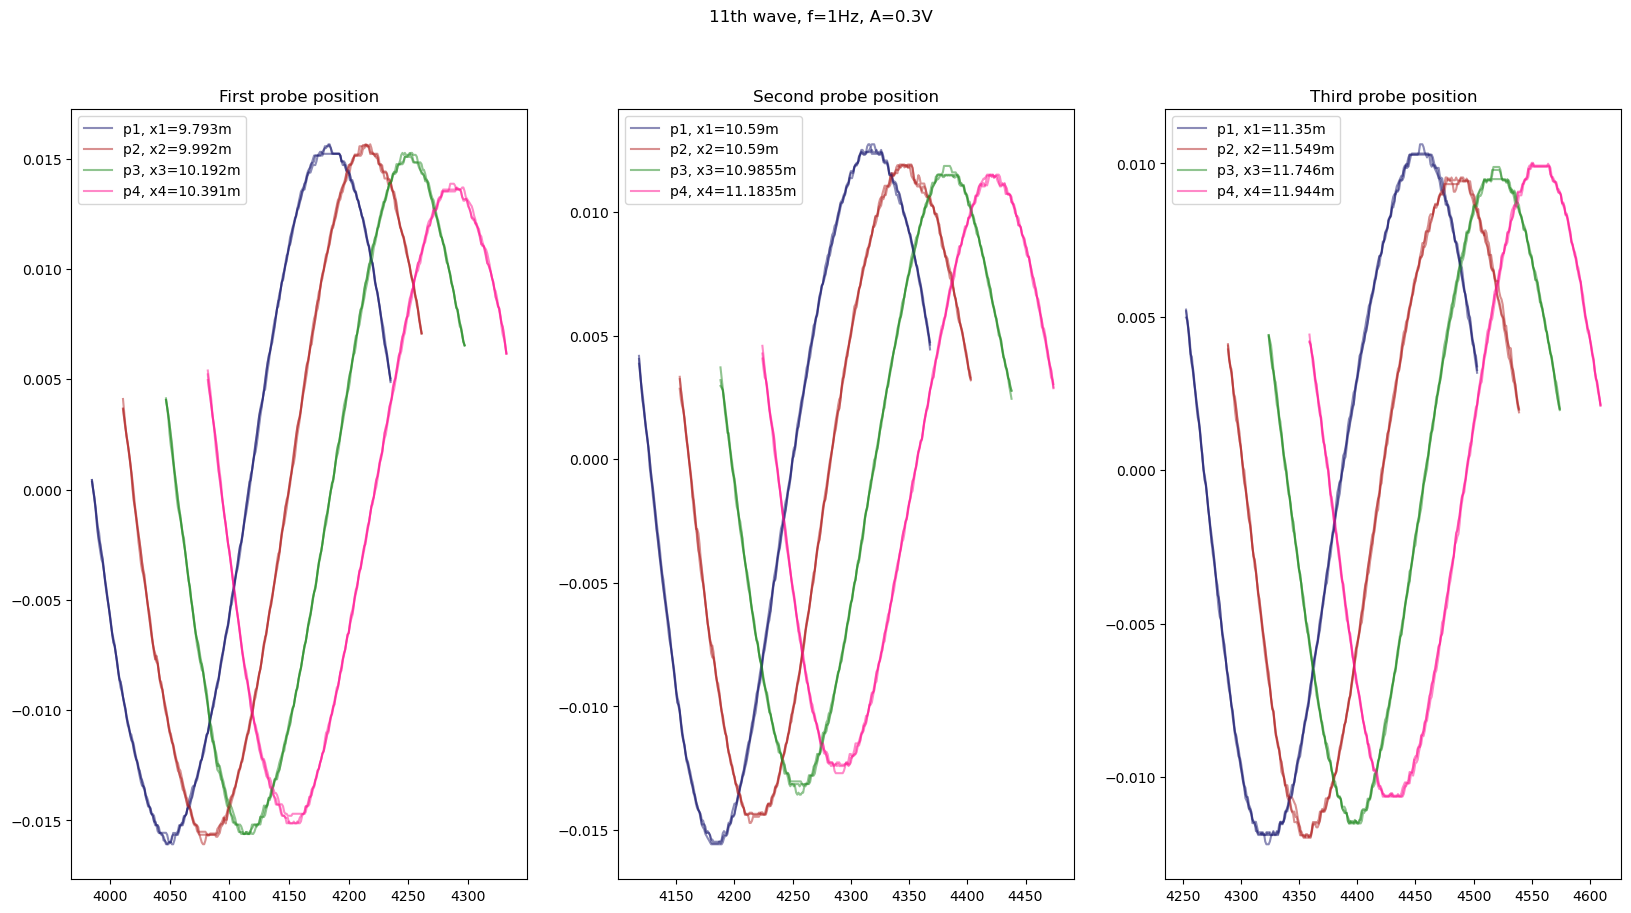

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].plot(x9793_f1_r1_clean.loc[wave_idx_p1_x9_r1:wave_idx_p1_x9_r1+250, 'p1'],  color='midnightblue', alpha=0.5)
ax[0].plot(x9793_f1_r1_clean.loc[wave_idx_p2_x9_r1:wave_idx_p2_x9_r1+250, 'p2'],  color='firebrick', alpha=0.5)
ax[0].plot(x9793_f1_r1_clean.loc[wave_idx_p3_x9_r1:wave_idx_p3_x9_r1+250, 'p3'],  color='forestgreen', alpha=0.5)
ax[0].plot(x9793_f1_r1_clean.loc[wave_idx_p4_x9_r1:wave_idx_p4_x9_r1+250, 'p4'],  color='deeppink', alpha=0.5)

ax[0].plot(x9793_f1_r2_clean.loc[wave_idx_p1_x9_r2:wave_idx_p1_x9_r2+250, 'p1'], color='midnightblue', alpha=0.5)
ax[0].plot(x9793_f1_r2_clean.loc[wave_idx_p2_x9_r2:wave_idx_p2_x9_r2+250, 'p2'], color='firebrick', alpha=0.5)
ax[0].plot(x9793_f1_r2_clean.loc[wave_idx_p3_x9_r2:wave_idx_p3_x9_r2+250, 'p3'],  color='forestgreen', alpha=0.5)
ax[0].plot(x9793_f1_r2_clean.loc[wave_idx_p4_x9_r2:wave_idx_p4_x9_r2+250, 'p4'],  color='deeppink', alpha=0.5)

ax[0].plot(x9793_f1_r3_clean.loc[wave_idx_p1_x9_r3:wave_idx_p1_x9_r3+250, 'p1'], label=f'p1, x1={x[0]}m', color='midnightblue', alpha=0.5)
ax[0].plot(x9793_f1_r3_clean.loc[wave_idx_p2_x9_r3:wave_idx_p2_x9_r3+250, 'p2'], label=f'p2, x2={x[1]}m', color='firebrick', alpha=0.5)
ax[0].plot(x9793_f1_r3_clean.loc[wave_idx_p3_x9_r3:wave_idx_p3_x9_r3+250, 'p3'], label=f'p3, x3={x[2]}m', color='forestgreen', alpha=0.5)
ax[0].plot(x9793_f1_r3_clean.loc[wave_idx_p4_x9_r3:wave_idx_p4_x9_r3+250, 'p4'], label=f'p4, x4={x[3]}m', color='deeppink', alpha=0.5)

ax[0].set_title('First probe position')
ax[0].legend()

ax[1].plot(x1059_f1_r1_clean.loc[wave_idx_p1_x10_r1:wave_idx_p1_x10_r1+250, 'p1'], color='midnightblue', alpha=0.5)
ax[1].plot(x1059_f1_r1_clean.loc[wave_idx_p2_x10_r1:wave_idx_p2_x10_r1+250, 'p2'],  color='firebrick', alpha=0.5)
ax[1].plot(x1059_f1_r1_clean.loc[wave_idx_p3_x10_r1:wave_idx_p3_x10_r1+250, 'p3'], color='forestgreen', alpha=0.5)
ax[1].plot(x1059_f1_r1_clean.loc[wave_idx_p4_x10_r1:wave_idx_p4_x10_r1+250, 'p4'],  color='deeppink', alpha=0.5)

ax[1].plot(x1059_f1_r2_clean.loc[wave_idx_p1_x10_r2:wave_idx_p1_x10_r2+250, 'p1'],  color='midnightblue', alpha=0.5)
ax[1].plot(x1059_f1_r2_clean.loc[wave_idx_p2_x10_r2:wave_idx_p2_x10_r2+250, 'p2'],  color='firebrick', alpha=0.5)
ax[1].plot(x1059_f1_r2_clean.loc[wave_idx_p3_x10_r2:wave_idx_p3_x10_r2+250, 'p3'],  color='forestgreen', alpha=0.5)
ax[1].plot(x1059_f1_r2_clean.loc[wave_idx_p4_x10_r2:wave_idx_p4_x10_r2+250, 'p4'], color='deeppink', alpha=0.5)

ax[1].plot(x1059_f1_r3_clean.loc[wave_idx_p1_x10_r3:wave_idx_p1_x10_r3+250, 'p1'], label=f'p1, x1={x[4]}m', color='midnightblue', alpha=0.5)
ax[1].plot(x1059_f1_r3_clean.loc[wave_idx_p2_x10_r3:wave_idx_p2_x10_r3+250, 'p2'], label=f'p2, x2={x[4]}m', color='firebrick', alpha=0.5)
ax[1].plot(x1059_f1_r3_clean.loc[wave_idx_p3_x10_r3:wave_idx_p3_x10_r3+250, 'p3'], label=f'p3, x3={x[6]}m', color='forestgreen', alpha=0.5)
ax[1].plot(x1059_f1_r3_clean.loc[wave_idx_p4_x10_r3:wave_idx_p4_x10_r3+250, 'p4'], label=f'p4, x4={x[7]}m', color='deeppink', alpha=0.5)

ax[1].set_title('Second probe position')
ax[1].legend()

ax[2].plot(x1135_f1_r1_clean.loc[wave_idx_p1_x11_r1:wave_idx_p1_x11_r1+250, 'p1'],  color='midnightblue', alpha=0.5)
ax[2].plot(x1135_f1_r1_clean.loc[wave_idx_p2_x11_r1:wave_idx_p2_x11_r1+250, 'p2'], color='firebrick', alpha=0.5)
ax[2].plot(x1135_f1_r1_clean.loc[wave_idx_p3_x11_r1:wave_idx_p3_x11_r1+250, 'p3'], color='forestgreen', alpha=0.5)
ax[2].plot(x1135_f1_r1_clean.loc[wave_idx_p4_x11_r1:wave_idx_p4_x11_r1+250, 'p4'],  color='deeppink', alpha=0.5)

ax[2].plot(x1135_f1_r2_clean.loc[wave_idx_p1_x11_r2:wave_idx_p1_x11_r2+250, 'p1'],  color='midnightblue', alpha=0.5)
ax[2].plot(x1135_f1_r2_clean.loc[wave_idx_p2_x11_r2:wave_idx_p2_x11_r2+250, 'p2'],  color='firebrick', alpha=0.5)
ax[2].plot(x1135_f1_r2_clean.loc[wave_idx_p3_x11_r2:wave_idx_p3_x11_r2+250, 'p3'],  color='forestgreen', alpha=0.5)
ax[2].plot(x1135_f1_r2_clean.loc[wave_idx_p4_x11_r2:wave_idx_p4_x11_r2+250, 'p4'],  color='deeppink', alpha=0.5)

ax[2].plot(x1135_f1_r3_clean.loc[wave_idx_p1_x11_r3:wave_idx_p1_x11_r3+250, 'p1'], label=f'p1, x1={x[8]}m', color='midnightblue', alpha=0.5)
ax[2].plot(x1135_f1_r3_clean.loc[wave_idx_p2_x11_r3:wave_idx_p2_x11_r3+250, 'p2'], label=f'p2, x2={x[9]}m', color='firebrick', alpha=0.5)
ax[2].plot(x1135_f1_r3_clean.loc[wave_idx_p3_x11_r3:wave_idx_p3_x11_r3+250, 'p3'], label=f'p3, x3={x[10]}m', color='forestgreen', alpha=0.5)
ax[2].plot(x1135_f1_r3_clean.loc[wave_idx_p4_x11_r3:wave_idx_p4_x11_r3+250, 'p4'], label=f'p4, x4={x[11]}m', color='deeppink', alpha=0.5)

ax[2].set_title('Third probe position')
ax[2].legend()

fig.suptitle('11th wave, f=1Hz, A=0.3V')

Text(0.5, 0.98, '11th wave, f=1Hz, A=0.3V')

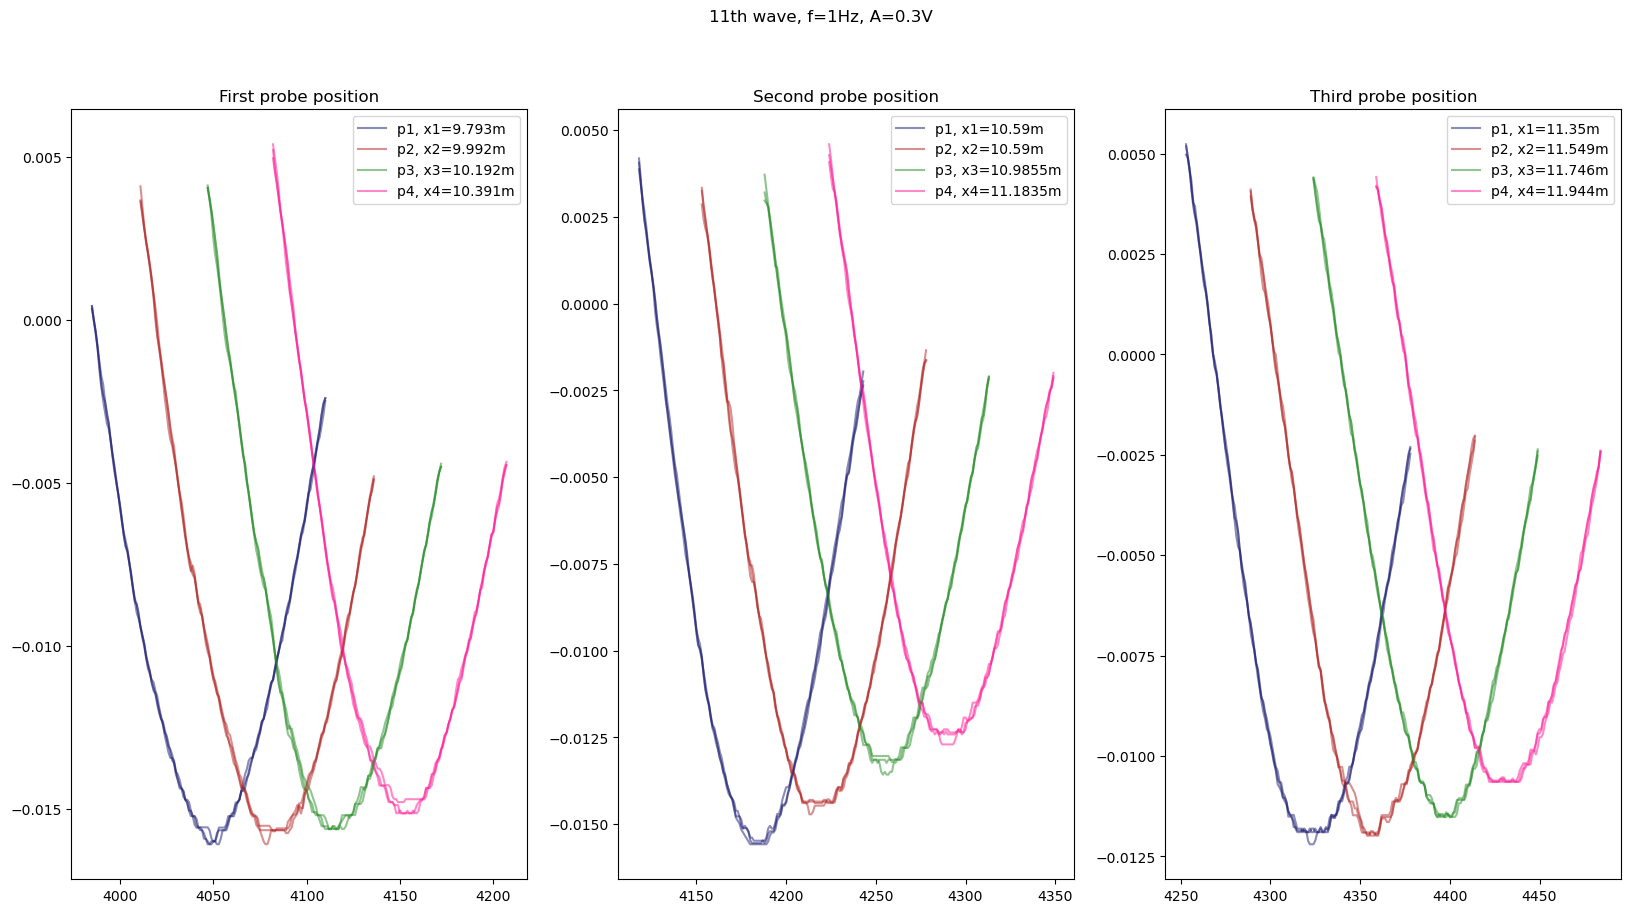

In [76]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].plot(x9793_f1_r1_clean.loc[wave_idx_p1_x9_r1:wave_idx_p1_x9_r1+125, 'p1'],  color='midnightblue', alpha=0.5)
ax[0].plot(x9793_f1_r1_clean.loc[wave_idx_p2_x9_r1:wave_idx_p2_x9_r1+125, 'p2'],  color='firebrick', alpha=0.5)
ax[0].plot(x9793_f1_r1_clean.loc[wave_idx_p3_x9_r1:wave_idx_p3_x9_r1+125, 'p3'],  color='forestgreen', alpha=0.5)
ax[0].plot(x9793_f1_r1_clean.loc[wave_idx_p4_x9_r1:wave_idx_p4_x9_r1+125, 'p4'],  color='deeppink', alpha=0.5)

ax[0].plot(x9793_f1_r2_clean.loc[wave_idx_p1_x9_r2:wave_idx_p1_x9_r2+125, 'p1'], color='midnightblue', alpha=0.5)
ax[0].plot(x9793_f1_r2_clean.loc[wave_idx_p2_x9_r2:wave_idx_p2_x9_r2+125, 'p2'], color='firebrick', alpha=0.5)
ax[0].plot(x9793_f1_r2_clean.loc[wave_idx_p3_x9_r2:wave_idx_p3_x9_r2+125, 'p3'],  color='forestgreen', alpha=0.5)
ax[0].plot(x9793_f1_r2_clean.loc[wave_idx_p4_x9_r2:wave_idx_p4_x9_r2+125, 'p4'],  color='deeppink', alpha=0.5)

ax[0].plot(x9793_f1_r3_clean.loc[wave_idx_p1_x9_r3:wave_idx_p1_x9_r3+125, 'p1'], label=f'p1, x1={x[0]}m', color='midnightblue', alpha=0.5)
ax[0].plot(x9793_f1_r3_clean.loc[wave_idx_p2_x9_r3:wave_idx_p2_x9_r3+125, 'p2'], label=f'p2, x2={x[1]}m', color='firebrick', alpha=0.5)
ax[0].plot(x9793_f1_r3_clean.loc[wave_idx_p3_x9_r3:wave_idx_p3_x9_r3+125, 'p3'], label=f'p3, x3={x[2]}m', color='forestgreen', alpha=0.5)
ax[0].plot(x9793_f1_r3_clean.loc[wave_idx_p4_x9_r3:wave_idx_p4_x9_r3+125, 'p4'], label=f'p4, x4={x[3]}m', color='deeppink', alpha=0.5)

ax[0].set_title('First probe position')
ax[0].legend()

ax[1].plot(x1059_f1_r1_clean.loc[wave_idx_p1_x10_r1:wave_idx_p1_x10_r1+125, 'p1'], color='midnightblue', alpha=0.5)
ax[1].plot(x1059_f1_r1_clean.loc[wave_idx_p2_x10_r1:wave_idx_p2_x10_r1+125, 'p2'],  color='firebrick', alpha=0.5)
ax[1].plot(x1059_f1_r1_clean.loc[wave_idx_p3_x10_r1:wave_idx_p3_x10_r1+125, 'p3'], color='forestgreen', alpha=0.5)
ax[1].plot(x1059_f1_r1_clean.loc[wave_idx_p4_x10_r1:wave_idx_p4_x10_r1+125, 'p4'],  color='deeppink', alpha=0.5)

ax[1].plot(x1059_f1_r2_clean.loc[wave_idx_p1_x10_r2:wave_idx_p1_x10_r2+125, 'p1'],  color='midnightblue', alpha=0.5)
ax[1].plot(x1059_f1_r2_clean.loc[wave_idx_p2_x10_r2:wave_idx_p2_x10_r2+125, 'p2'],  color='firebrick', alpha=0.5)
ax[1].plot(x1059_f1_r2_clean.loc[wave_idx_p3_x10_r2:wave_idx_p3_x10_r2+125, 'p3'],  color='forestgreen', alpha=0.5)
ax[1].plot(x1059_f1_r2_clean.loc[wave_idx_p4_x10_r2:wave_idx_p4_x10_r2+125, 'p4'], color='deeppink', alpha=0.5)

ax[1].plot(x1059_f1_r3_clean.loc[wave_idx_p1_x10_r3:wave_idx_p1_x10_r3+125, 'p1'], label=f'p1, x1={x[4]}m', color='midnightblue', alpha=0.5)
ax[1].plot(x1059_f1_r3_clean.loc[wave_idx_p2_x10_r3:wave_idx_p2_x10_r3+125, 'p2'], label=f'p2, x2={x[4]}m', color='firebrick', alpha=0.5)
ax[1].plot(x1059_f1_r3_clean.loc[wave_idx_p3_x10_r3:wave_idx_p3_x10_r3+125, 'p3'], label=f'p3, x3={x[6]}m', color='forestgreen', alpha=0.5)
ax[1].plot(x1059_f1_r3_clean.loc[wave_idx_p4_x10_r3:wave_idx_p4_x10_r3+125, 'p4'], label=f'p4, x4={x[7]}m', color='deeppink', alpha=0.5)

ax[1].set_title('Second probe position')
ax[1].legend()

ax[2].plot(x1135_f1_r1_clean.loc[wave_idx_p1_x11_r1:wave_idx_p1_x11_r1+125, 'p1'],  color='midnightblue', alpha=0.5)
ax[2].plot(x1135_f1_r1_clean.loc[wave_idx_p2_x11_r1:wave_idx_p2_x11_r1+125, 'p2'], color='firebrick', alpha=0.5)
ax[2].plot(x1135_f1_r1_clean.loc[wave_idx_p3_x11_r1:wave_idx_p3_x11_r1+125, 'p3'], color='forestgreen', alpha=0.5)
ax[2].plot(x1135_f1_r1_clean.loc[wave_idx_p4_x11_r1:wave_idx_p4_x11_r1+125, 'p4'],  color='deeppink', alpha=0.5)

ax[2].plot(x1135_f1_r2_clean.loc[wave_idx_p1_x11_r2:wave_idx_p1_x11_r2+125, 'p1'],  color='midnightblue', alpha=0.5)
ax[2].plot(x1135_f1_r2_clean.loc[wave_idx_p2_x11_r2:wave_idx_p2_x11_r2+125, 'p2'],  color='firebrick', alpha=0.5)
ax[2].plot(x1135_f1_r2_clean.loc[wave_idx_p3_x11_r2:wave_idx_p3_x11_r2+125, 'p3'],  color='forestgreen', alpha=0.5)
ax[2].plot(x1135_f1_r2_clean.loc[wave_idx_p4_x11_r2:wave_idx_p4_x11_r2+125, 'p4'],  color='deeppink', alpha=0.5)

ax[2].plot(x1135_f1_r3_clean.loc[wave_idx_p1_x11_r3:wave_idx_p1_x11_r3+125, 'p1'], label=f'p1, x1={x[8]}m', color='midnightblue', alpha=0.5)
ax[2].plot(x1135_f1_r3_clean.loc[wave_idx_p2_x11_r3:wave_idx_p2_x11_r3+125, 'p2'], label=f'p2, x2={x[9]}m', color='firebrick', alpha=0.5)
ax[2].plot(x1135_f1_r3_clean.loc[wave_idx_p3_x11_r3:wave_idx_p3_x11_r3+125, 'p3'], label=f'p3, x3={x[10]}m', color='forestgreen', alpha=0.5)
ax[2].plot(x1135_f1_r3_clean.loc[wave_idx_p4_x11_r3:wave_idx_p4_x11_r3+125, 'p4'], label=f'p4, x4={x[11]}m', color='deeppink', alpha=0.5)

ax[2].set_title('Third probe position')
ax[2].legend()

fig.suptitle('11th wave, f=1Hz, A=0.3V')


In [77]:
# First position
# Finding max signal for r1
max_x9_f1_r1_p1 = x9793_f1_r1_clean.loc[wave_idx_p1_x9_r1:wave_idx_p1_x9_r1+125, 'p1'].abs().max()
max_x9_f1_r1_p2 = x9793_f1_r1_clean.loc[wave_idx_p2_x9_r1:wave_idx_p2_x9_r1+125, 'p2'].abs().max()
max_x9_f1_r1_p3 = x9793_f1_r1_clean.loc[wave_idx_p3_x9_r1:wave_idx_p3_x9_r1+125, 'p3'].abs().max()
max_x9_f1_r1_p4 = x9793_f1_r1_clean.loc[wave_idx_p4_x9_r1:wave_idx_p4_x9_r1+125, 'p4'].abs().max()

max_x9_f1_r1 = np.array([max_x9_f1_r1_p1, max_x9_f1_r1_p2, max_x9_f1_r1_p3, max_x9_f1_r1_p4])

# Finding max signal for r2
max_x9_f1_r2_p1 = x9793_f1_r2_clean.loc[wave_idx_p1_x9_r2:wave_idx_p1_x9_r2+125, 'p1'].abs().max()
max_x9_f1_r2_p2 = x9793_f1_r2_clean.loc[wave_idx_p2_x9_r2:wave_idx_p2_x9_r2+125, 'p2'].abs().max()
max_x9_f1_r2_p3 = x9793_f1_r2_clean.loc[wave_idx_p3_x9_r2:wave_idx_p3_x9_r2+125, 'p3'].abs().max()
max_x9_f1_r2_p4 = x9793_f1_r2_clean.loc[wave_idx_p4_x9_r2:wave_idx_p4_x9_r2+125, 'p4'].abs().max()

max_x9_f1_r2 = np.array([max_x9_f1_r2_p1, max_x9_f1_r2_p2, max_x9_f1_r2_p3, max_x9_f1_r2_p4])

# Finding max signal for r3
max_x9_f1_r3_p1 = x9793_f1_r3_clean.loc[wave_idx_p1_x9_r3:wave_idx_p1_x9_r3+125, 'p1'].abs().max()
max_x9_f1_r3_p2 = x9793_f1_r3_clean.loc[wave_idx_p2_x9_r3:wave_idx_p2_x9_r3+125, 'p2'].abs().max()
max_x9_f1_r3_p3 = x9793_f1_r3_clean.loc[wave_idx_p3_x9_r3:wave_idx_p3_x9_r3+125, 'p3'].abs().max()
max_x9_f1_r3_p4 = x9793_f1_r3_clean.loc[wave_idx_p4_x9_r3:wave_idx_p4_x9_r3+125, 'p4'].abs().max()

max_x9_f1_r3 = np.array([max_x9_f1_r3_p1, max_x9_f1_r3_p2, max_x9_f1_r3_p3, max_x9_f1_r3_p4])


In [78]:
# Second position
# Finding max signal for r1
max_x10_f1_r1_p1 = x1059_f1_r1_clean.loc[wave_idx_p1_x10_r1:wave_idx_p1_x10_r1+125, 'p1'].max()
max_x10_f1_r1_p2 = x1059_f1_r1_clean.loc[wave_idx_p2_x10_r1:wave_idx_p2_x10_r1+125, 'p2'].max()
max_x10_f1_r1_p3 = x1059_f1_r1_clean.loc[wave_idx_p3_x10_r1:wave_idx_p3_x10_r1+125, 'p3'].max()
max_x10_f1_r1_p4 = x1059_f1_r1_clean.loc[wave_idx_p4_x10_r1:wave_idx_p4_x10_r1+125, 'p4'].max()

max_x10_f1_r1 = np.array([max_x10_f1_r1_p1, max_x10_f1_r1_p2, max_x10_f1_r1_p3, max_x10_f1_r1_p4])

# Finding max signal for r2
max_x10_f1_r2_p1 = x1059_f1_r2_clean.loc[wave_idx_p1_x10_r2:wave_idx_p1_x10_r2+125, 'p1'].max()
max_x10_f1_r2_p2 = x1059_f1_r2_clean.loc[wave_idx_p2_x10_r2:wave_idx_p2_x10_r2+125, 'p2'].max()
max_x10_f1_r2_p3 = x1059_f1_r2_clean.loc[wave_idx_p3_x10_r2:wave_idx_p3_x10_r2+125, 'p3'].max()
max_x10_f1_r2_p4 = x1059_f1_r2_clean.loc[wave_idx_p4_x10_r2:wave_idx_p4_x10_r2+125, 'p4'].max()

max_x10_f1_r2 = np.array([max_x10_f1_r2_p1, max_x10_f1_r2_p2, max_x10_f1_r2_p3, max_x10_f1_r2_p4])

# Finding max signal for r3
max_x10_f1_r3_p1 = x1059_f1_r3_clean.loc[wave_idx_p1_x10_r3:wave_idx_p1_x10_r3+125, 'p1'].max()
max_x10_f1_r3_p2 = x1059_f1_r3_clean.loc[wave_idx_p2_x10_r3:wave_idx_p2_x10_r3+125, 'p2'].max()
max_x10_f1_r3_p3 = x1059_f1_r3_clean.loc[wave_idx_p3_x10_r3:wave_idx_p3_x10_r3+125, 'p3'].max()
max_x10_f1_r3_p4 = x1059_f1_r3_clean.loc[wave_idx_p4_x10_r3:wave_idx_p4_x10_r3+125, 'p4'].max()

max_x10_f1_r3 = np.array([max_x10_f1_r3_p1, max_x10_f1_r3_p2, max_x10_f1_r3_p3, max_x10_f1_r3_p4])

In [79]:
# Third position
# Finding max signal for r1
max_x11_f1_r1_p1 = x1135_f1_r1_clean.loc[wave_idx_p1_x11_r1:wave_idx_p1_x11_r1+125, 'p1'].max()
max_x11_f1_r1_p2 = x1135_f1_r1_clean.loc[wave_idx_p2_x11_r1:wave_idx_p2_x11_r1+125, 'p2'].max()
max_x11_f1_r1_p3 = x1135_f1_r1_clean.loc[wave_idx_p3_x11_r1:wave_idx_p3_x11_r1+125, 'p3'].max()
max_x11_f1_r1_p4 = x1135_f1_r1_clean.loc[wave_idx_p4_x11_r1:wave_idx_p4_x11_r1+125, 'p4'].max()

max_x11_f1_r1 = np.array([max_x11_f1_r1_p1, max_x11_f1_r1_p2, max_x11_f1_r1_p3, max_x11_f1_r1_p4])

# Finding max signal for r2
max_x11_f1_r2_p1 = x1135_f1_r2_clean.loc[wave_idx_p1_x11_r2:wave_idx_p1_x11_r2+125, 'p1'].max()
max_x11_f1_r2_p2 = x1135_f1_r2_clean.loc[wave_idx_p2_x11_r2:wave_idx_p2_x11_r2+125, 'p2'].max()
max_x11_f1_r2_p3 = x1135_f1_r2_clean.loc[wave_idx_p3_x11_r2:wave_idx_p3_x11_r2+125, 'p3'].max()
max_x11_f1_r2_p4 = x1135_f1_r2_clean.loc[wave_idx_p4_x11_r2:wave_idx_p4_x11_r2+125, 'p4'].max()

max_x11_f1_r2 = np.array([max_x11_f1_r2_p1, max_x11_f1_r2_p2, max_x11_f1_r2_p3, max_x11_f1_r2_p4])

# Finding max signal for r3
max_x11_f1_r3_p1 = x1135_f1_r3_clean.loc[wave_idx_p1_x11_r3:wave_idx_p1_x11_r3+125, 'p1'].max()
max_x11_f1_r3_p2 = x1135_f1_r3_clean.loc[wave_idx_p2_x11_r3:wave_idx_p2_x11_r3+125, 'p2'].max()
max_x11_f1_r3_p3 = x1135_f1_r3_clean.loc[wave_idx_p3_x11_r3:wave_idx_p3_x11_r3+125, 'p3'].max()
max_x11_f1_r3_p4 = x1135_f1_r3_clean.loc[wave_idx_p4_x11_r3:wave_idx_p4_x11_r3+125, 'p4'].max()

max_x11_f1_r3 = np.array([max_x11_f1_r3_p1, max_x11_f1_r3_p2, max_x11_f1_r3_p3, max_x11_f1_r3_p4])


Text(0.5, 0.98, 'Maximum wave height of 11th wave')

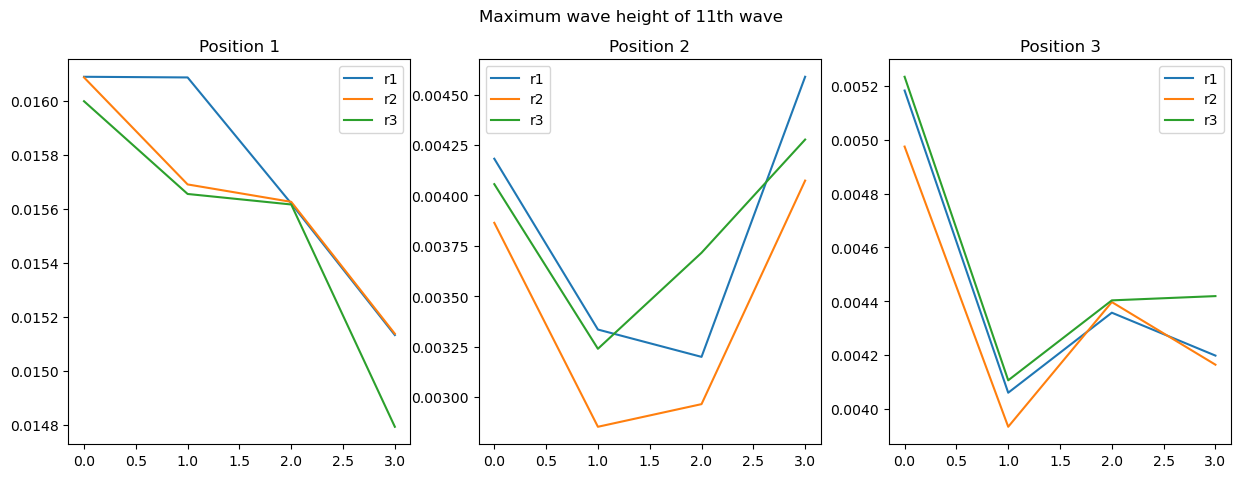

In [80]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].plot(max_x9_f1_r1, label='r1')
ax[0].plot(max_x9_f1_r2, label='r2')
ax[0].plot(max_x9_f1_r3, label='r3')
ax[0].set_title('Position 1')
ax[0].legend()

ax[1].plot(max_x10_f1_r1, label='r1')
ax[1].plot(max_x10_f1_r2, label='r2')
ax[1].plot(max_x10_f1_r3, label='r3')
ax[1].set_title('Position 2')
ax[1].legend()

ax[2].plot(max_x11_f1_r1, label='r1')
ax[2].plot(max_x11_f1_r2, label='r2')
ax[2].plot(max_x11_f1_r3, label='r3')
ax[2].set_title('Position 3')
ax[2].legend()

fig.suptitle('Maximum wave height of 11th wave')

In [81]:
# change in amplitude over 1st probe positions:
damp_pos1_r1 = np.max(max_x9_f1_r1) - np.min(max_x9_f1_r1)
damp_pos1_r2 = np.max(max_x9_f1_r2) - np.min(max_x9_f1_r2)
damp_pos1_r3 = np.max(max_x9_f1_r3) - np.min(max_x9_f1_r3)

print(damp_pos1_r1, damp_pos1_r2, damp_pos1_r3)

# change in amplitude over 2nd probe positions:
damp_pos2_r1 = np.max(max_x10_f1_r1) - np.min(max_x10_f1_r1)
damp_pos2_r2 = np.max(max_x10_f1_r2) - np.min(max_x10_f1_r2)
damp_pos2_r3 = np.max(max_x10_f1_r3) - np.min(max_x10_f1_r3)

print(damp_pos2_r1, damp_pos2_r2, damp_pos2_r3)

# change in amplitude over 3rd probe positions:
damp_pos3_r1 = np.max(max_x11_f1_r1) - np.min(max_x11_f1_r1)
damp_pos3_r2 = np.max(max_x11_f1_r2) - np.min(max_x11_f1_r2)
damp_pos3_r3 = np.max(max_x11_f1_r3) - np.min(max_x11_f1_r3)

print(damp_pos3_r1, damp_pos3_r2, damp_pos3_r3)

0.0009544199999999975 0.0009472000000000005 0.0012030899999999987
0.00138865 0.0012205299999999996 0.0010372700000000003
0.0011214600000000003 0.00103986 0.0011264299999999994


Amplitude of wave at x meters after start of beach: 

$A = A_0 exp(-\alpha x)$

where $A_0$ is the amplitude at $x=0$, meaning the beginning of the beach. 

Thus, the wave damping is:
$\alpha = \frac{ln(A_0) - ln(A(x_1))}{x_1 - x_0}$

In [82]:
def alpha(A0, A1, x0, x1):
    alpha = (np.log(A0) - np.log(A1))/(x1 - x0)
    return alpha

In [83]:
A0 = max_x9_f1_r1[0]  # max height measured at the first probe, located 10 cm before the beach

alpha_1_r1 = alpha(A0, max_x9_f1_r1[0], x[0], x[1])
alpha_2_r1 = alpha(A0, max_x9_f1_r1[1], x[0], x[2])
alpha_3_r1 = alpha(A0, max_x9_f1_r1[2], x[0], x[3])
alpha_4_r1 = alpha(A0, max_x9_f1_r1[3], x[0], x[4])

alpha_1_r2 = alpha(A0, max_x9_f1_r2[0], x[0], x[1])
alpha_2_r2 = alpha(A0, max_x9_f1_r2[1], x[0], x[2])
alpha_3_r2 = alpha(A0, max_x9_f1_r2[2], x[0], x[3])
alpha_4_r2 = alpha(A0, max_x9_f1_r2[3], x[0], x[4])

alpha_1_r3 = alpha(A0, max_x9_f1_r3[0], x[0], x[1])
alpha_2_r3 = alpha(A0, max_x9_f1_r3[1], x[0], x[2])
alpha_3_r3 = alpha(A0, max_x9_f1_r3[2], x[0], x[3])
alpha_4_r3 = alpha(A0, max_x9_f1_r3[3], x[0], x[4])

In [84]:
alpha_5_r1 = alpha(A0, max_x10_f1_r1[0], x[0], x[5])
alpha_6_r1 = alpha(A0, max_x10_f1_r1[1], x[0], x[6])
alpha_7_r1 = alpha(A0, max_x10_f1_r1[2], x[0], x[7])
alpha_8_r1 = alpha(A0, max_x10_f1_r1[3], x[0], x[8])

alpha_5_r2 = alpha(A0, max_x10_f1_r2[0], x[0], x[5])
alpha_6_r2 = alpha(A0, max_x10_f1_r2[1], x[0], x[6])
alpha_7_r2 = alpha(A0, max_x10_f1_r2[2], x[0], x[7])
alpha_8_r2 = alpha(A0, max_x10_f1_r2[3], x[0], x[8])

alpha_5_r3 = alpha(A0, max_x10_f1_r3[0], x[0], x[5])
alpha_6_r3 = alpha(A0, max_x10_f1_r3[1], x[0], x[6])
alpha_7_r3 = alpha(A0, max_x10_f1_r3[2], x[0], x[7])
alpha_8_r3 = alpha(A0, max_x10_f1_r3[3], x[0], x[8])

In [85]:
alpha_9_r1 = alpha(A0, max_x11_f1_r1[0], x[0], x[9])
alpha_10_r1 = alpha(A0, max_x11_f1_r1[1], x[0], x[10])
alpha_11_r1 = alpha(A0, max_x11_f1_r1[2], x[0], x[11])

alpha_9_r2 = alpha(A0, max_x11_f1_r2[0], x[0], x[9])
alpha_10_r2 = alpha(A0, max_x11_f1_r2[1], x[0], x[10])
alpha_11_r2 = alpha(A0, max_x11_f1_r2[2], x[0], x[11])

alpha_9_r3 = alpha(A0, max_x11_f1_r3[0], x[0], x[9])
alpha_10_r3 = alpha(A0, max_x11_f1_r3[1], x[0], x[10])
alpha_11_r3 = alpha(A0, max_x11_f1_r3[2], x[0], x[11])

In [86]:
alpha_r1 = np.array([alpha_1_r1, alpha_2_r1, alpha_3_r1, alpha_4_r1, alpha_5_r1, alpha_6_r1, alpha_7_r1, alpha_8_r1, alpha_9_r1, alpha_10_r1, alpha_11_r1])
alpha_r2 = np.array([alpha_1_r2, alpha_2_r2, alpha_3_r2, alpha_4_r2, alpha_5_r2, alpha_6_r2, alpha_7_r2, alpha_8_r2, alpha_9_r2, alpha_10_r2, alpha_11_r2])
alpha_r3 = np.array([alpha_1_r3, alpha_2_r3, alpha_3_r3, alpha_4_r3, alpha_5_r3, alpha_6_r3, alpha_7_r3, alpha_8_r3, alpha_9_r3, alpha_10_r3, alpha_11_r3])

Text(0.5, 0.98, 'Alpha over beach')

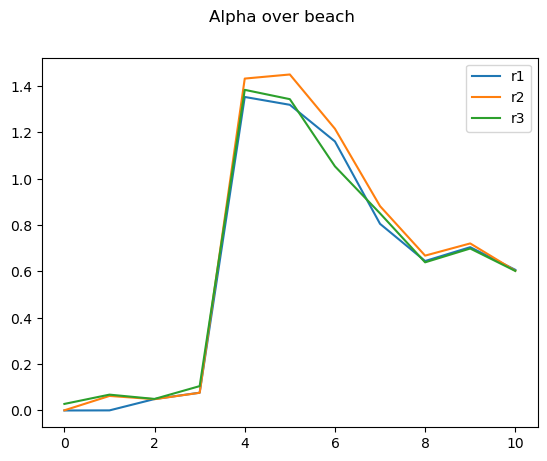

In [87]:
fig, ax = plt.subplots()
ax.plot(alpha_r1, label='r1')
ax.plot(alpha_r2, label='r2')
ax.plot(alpha_r3, label='r3')
ax.legend()
fig.suptitle('Alpha over beach')

__Looking at noise data. Measurements of still water taken over 2 minutes by 4 probes.__

In [88]:
noise = pd.read_csv('/Users/kjesta/Desktop/Lab-Experiments-program/Damping_KjerstisVersion/26032025/Noise Measurement/Noise_Measurement_modified.csv')

Text(0.5, 1.0, 'Mean water height per probe, measured over 2 minutes')

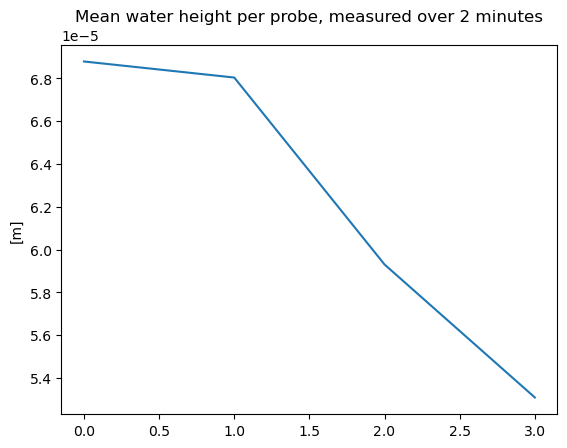

In [89]:
mean = []
for column in noise.columns[1:-1]:
    mean.append(noise[column].mean())
    
plt.plot(mean)
plt.ylabel('[m]')
plt.title('Mean water height per probe, measured over 2 minutes')